In [2]:
import numpy as np
from numpy import *
from numpy import nan
import os
import matplotlib.pyplot as plt
import astropy
import pandas as pd
from astropy.io import fits
from astropy.table import Table
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
import matplotlib as mpl
from matplotlib import pyplot as plt
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
# %pylab
# pd.set_option('display.mpl_style', 'default')
# import scipy.integrate
plt.style.use(astropy_mpl_style)

In [3]:
#Need to get rid of 0 points (non readings) and bad readings
def FancyPlot(xlab='',ylab='',lw=2.5,lfs=45,tfs=25,size_x=13,size_y=12):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    mpl.rcParams['mathtext.default'] = 'regular'
    fig = plt.figure(figsize=(size_x,size_y))
    ax=fig.add_subplot(111)
    ax.set_xlabel(xlab,fontsize=lfs)
    ax.set_ylabel(ylab,fontsize=lfs)
    ax.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax.grid(False)
    return fig,ax
def HexPlot(xlab1='',ylab1='',xlab2='',ylab2='',xlab3='',ylab3='',\
           wspace=0.25,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=7,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    fig,axarr =plt.subplots(1,3,figsize=(size_x,size_y))
    gs=gridspec.GridSpec(1,3)
    gs.update(wspace=wspace)
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    ax3=plt.subplot(gs[2])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax3.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=7)
    ax3.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    
    ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    ax3.set_xlabel(xlab3,fontsize=lfs)
    ax3.set_ylabel(ylab3,fontsize=lfs)
    
    ax1.grid(False)
    ax2.grid(False)
    ax3.grid(False)
    return fig,ax1,ax2,ax3
def StackedPlot(xlab1='',ylab1='',xlab2='',ylab2='',\
                hspace=0.01,lw=2.5,lfs=45,tfs=25,size_x=20,size_y=11,Grid=False):
    plt.rcParams['axes.linewidth']=lw
    plt.rc('text',usetex=True)
    plt.rc('font',family='serif',size=tfs)
    mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
    
    fig,axarr =plt.subplots(2,1,figsize=(size_x,size_y),sharex=True,sharey=True)
    gs=gridspec.GridSpec(2,1,height_ratios=(9, 1))
    gs.update(hspace=hspace)
    
    ax1=plt.subplot(gs[0])
    ax2=plt.subplot(gs[1])
    
    ax1.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax1.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax1.set_xticklabels([],c='w')
    
    ax2.tick_params(which='major',direction='in',width=2,length=13,right=True,top=True,pad=0)
    ax2.tick_params(which='minor',direction='in',width=1,length=10,right=True,top=True)
    ax2.set_xticks([3,4,5,6,7,8])
    ax2.set_yticks([-1,0,1])
#     ax2.
#     ax2.set_xlim
    
#     ax1.set_xlabel(xlab1,fontsize=lfs)
    ax1.set_ylabel(ylab1,fontsize=lfs)
    
    ax2.set_xlabel(xlab2,fontsize=lfs)
    ax2.set_ylabel(ylab2,fontsize=lfs)
    
    if Grid:
        axs[0].grid()
        axs[1].grid()
    ax1.grid(False)
    return fig,ax1,ax2

In [3]:
# path = os.path.expanduser('~/Documents/FINALM/')

# Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 

# path2 = os.path.expanduser('~/Documents/')
# comp_ew=Table.read(os.path.expanduser(path2+'comp_ew.dat'),format='ascii')
# xy = comp_ew.to_pandas()
# xyz = xy[xy['col1']<100000]
# stuff = xyz.drop(['col3','col4'],axis=1)
# stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)
# # Montague
# # chestnut1=[]
# # sunshine1=[]
# # rainbow1=[]
# Montague2 = Montague.where(Montague['id'].isin(stuff['id'])).dropna()
# Montague2['id'].iloc[0]

/tmp/ipykernel_2255028/614494009.py:180: RuntimeWarning: divide by zero encountered in log10
  Unatten_log=log10(E)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_2255028/614494009.py:189: RuntimeWarning: invalid value encountered in log10
  if log10(-Res[i])>5:
/tmp/ipykernel_2255028/4268888294.py:56: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r'\usepackage{mathpazo}']
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/numpy/core/_metho

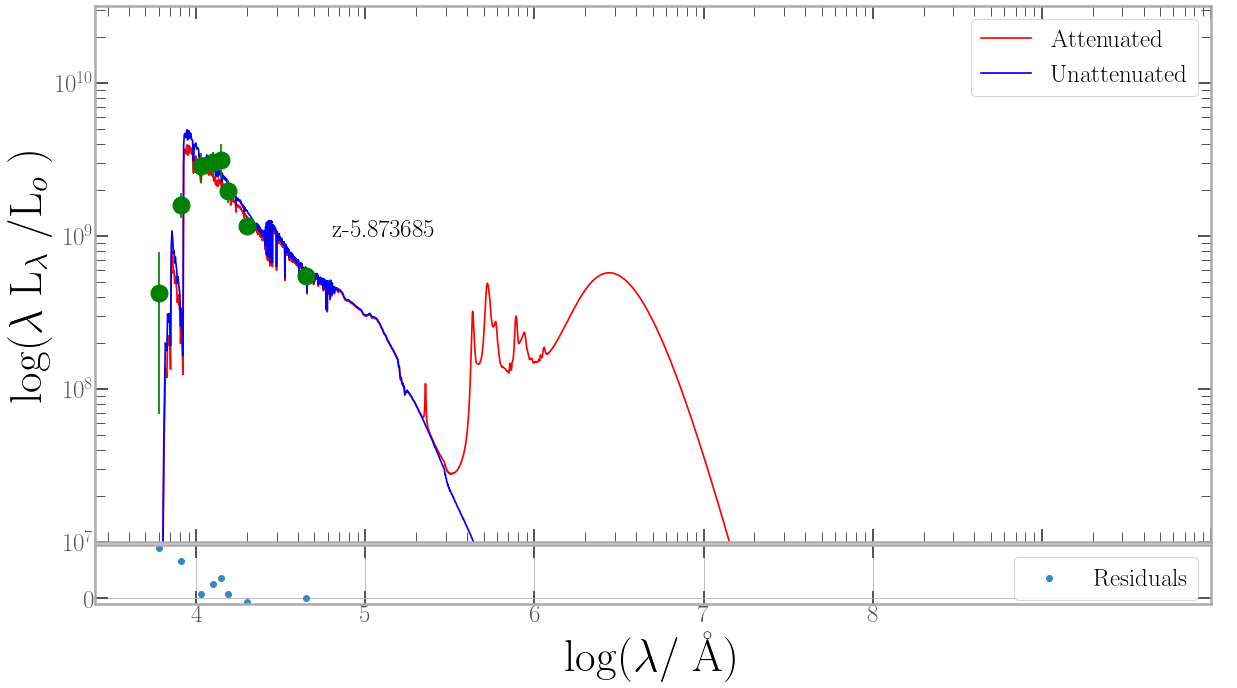

In [61]:
# %%capture
path = os.path.expanduser('~/Documents/CEERS4/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 

path2 = os.path.expanduser('~/Documents/')
comp_ew=Table.read(os.path.expanduser(path2+'comp_ew.dat'),format='ascii')
xy = comp_ew.to_pandas()
xyz = xy[xy['col1']<100000]
stuff = xyz.drop(['col3','col4'],axis=1)
stuff.rename(columns={'col1':'id' ,'col2':'redshift'} ,inplace=True)

chestnut1=[]
sunshine1=[]
rainbow1=[]
# Montague2 = Montague.where(Montague['id'].isin(stuff['id'])).dropna()
for Treesa in range(1):
#     potato=str(int(Montague2['id'].iloc[19]))
    potato=str(Montague['id'][Treesa])
#     potato=str(667)
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=0,on_bad_lines='skip')
    short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
    short2 = pd.DataFrame(columns=['Name'])
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    galaxy_fit2 = pd.DataFrame(columns=['Full'])
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    galaxy_fit3 = pd.DataFrame(columns=[])
    galaxy_fit_s = galaxy_fit.drop(galaxy_fit.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]])

    chi2 = float(galaxy_fit.index[6].split()[2])
    chestnut1.append(chi2)
    Stellar_mass = float(galaxy_fit.index[8].split()[5])
    sunshine1.append(Stellar_mass)
    StarForm = float(galaxy_fit.index[8].split()[15])
    rainbow1.append(StarForm)
    for i in range(len(short)):
        line = short.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=3:
            continue
        str_line = " ".join(str(item) for item in line)
        short2.loc[i]=str(str_line)

    short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)

    short2=short2.drop(['Name'],axis=1)

    SED = Table.from_pandas(short2)
    A=[float(s) for s in SED['A']]
    B=[float(s) for s in SED['B']]
    C=[float(s) for s in SED['C']]
    #SED FILE is in L_lambda/LoA^-1. A is log of the wavelength in angstroms
    
    redshift =float(galaxy_fit.index[6].split()[-1])
    light=2.998*(10**18) #speed of light in Angstroms ~ A/s
    lambda_cA = lambda_c*10000 #central wavelength in Angstroms
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    dist = meters.value
    B = np.array(B)
    A = np.array(A)
    L_lambda = 10**B #L_0/Angstroms
    lambd = 10**A #Angstroms
    L_nu=L_lambda*lambd**2/light #L_0
    f_nu = (L_nu*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
#     f_nu = (L_nu*(3.826*10**26))/(4*pi*dist**2)
    f_nu = f_nu/10**-26
    # print(f_nu)

    C = np.array(C)
    L_lambda2=10**C
    L_nu2=L_lambda2*lambd**2/light
    f_nu2 =(L_nu2*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
    f_nu2 = f_nu2/10**-26

    f_lambda = light*f_nu/lambd**2
    f_lambda2 = light*f_nu2/lambd**2
    
    
  
    ###################################################
    for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=14:
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


    names = []
    for i in range(len(Filters['Name'])):
          names.append(Filters.iloc[i,0])
    names
    galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
    galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
    
    ###################################################
#     errtest=Montague.iloc[Montague.loc[Montague['id']==int(potato)].index[0],3:len(Montague.iloc[0])][::2]
#     flux = Montague.iloc[Montague.loc[Montague['id']==int(potato)].index[0],2:len(Montague.iloc[0])][::2]
#     flux_fit = galaxy_fit2.loc[1].apply(lambda x: float(x))
#     errtest_fit = galaxy_fit2.loc[2].apply(lambda x: float(x))
# #     L_flux=((1+redshift)*flux*3e14)/np.array(lambda_c)                                                                       
#     Lum_vHz = galaxy_fit2.loc[10].apply(lambda x: float(x))
#     flux_v =(Lum_vHz*(3.826*10**26)*(1+redshift))/(4*pi*dist**2)
#     flux_v = flux_v/10**-26                                                                       
# #     p=['red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red','green','blue','red']
#     for i in range(len(flux_fit)):
#         if np.array(flux_fit[i])<0:
#             flux_v[i]=nan
#             errtest[i]=0
#         if np.array(Lum_vHz[i])<=0:
#             errtest[i]=0
    
#     fig,ax=FancyPlot(r'$\lambda$/\AA',r'F$_{\nu}$/Jy')
#     ax.set_yscale('log')
#     ax.set_xscale('log')
#     ax.set_ylim(bottom=10**-8,top=10**-4)
#     ax.set_xlim(left=10**2.5,right=10**5.5)
#     plt.plot(10**A,10**log10(f_nu)/(1+redshift),label='Attenuated')
#     plt.plot(10**A,10**log10(f_nu2)/(1+redshift),label='Unattenuated')
#     plt.annotate(r'$\chi^2$-'+str(chi2),xy=(10**5,10**-6.5),size=25)
#     plt.annotate('id-'+str(potato),xy=(10**5,10**-6.7),size=25)
#     plt.annotate('z-'+str(redshift),xy=(10**5,10**-6.9),size=25)
#     plt.legend()
# #     plt.scatter(lambda_cA,y=flux*(1+redshift),c=p)
#     plt.errorbar(x=lambda_cA,y=flux,yerr=errtest,fmt='o',c='red',ms=7.5)

# ###################################################################
#     flux_lambda = np.array(flux)*light/lambda_cA**2
#     flux_lambda_err = np.array(errtest)*light/lambda_cA**2
#     flux_v_lambda = np.array(flux_v)*light/lambda_cA**2
#     flux_v_lambda_err = np.array(errtest)*light/lambda_cA**2
#     fig,ax=FancyPlot(r'$\lambda$/\AA',r'F$_{\lambda}$/Jy')
#     ax.set_yscale('log')
#     ax.set_xscale('log')
#     ax.set_ylim(bottom=10**2,top=10**5)
#     ax.set_xlim(left=10**3.5,right=10**5.5)
#     plt.plot(10**A,10**log10(f_lambda/(1+redshift)),label='Attenuated')
#     plt.plot(10**A,10**log10(f_lambda2/(1+redshift)),label='Unattenuated')
#     plt.annotate(potato,xy=(10**4,10**-7))
#     plt.legend()
# #     plt.scatter(lambda_cA,y=flux*(1+redshift),c=p)
#     plt.errorbar(x=lambda_cA,y=flux_lambda,yerr=flux_lambda_err,fmt='o',c='red')
###################################################################

# # Filters

    test=Table.from_pandas(galaxy_fit2)
    L_nu=[float(s) for s in test[0]] #First row.
    L_nu_err=[float(s) for s in test[1]] #Second row
    L_nu=np.array(L_nu) #Luminosity per unit Hz - L_o/s^-1 = L_o*s This is a flux unit but it's not Janskys. 
    L_nu_err=np.array(L_nu_err)

    L_nu_err=L_nu_err#*(1+redshift)
    lL_lambda_err=L_nu_err*light/lambda_cA


    L_lambda=L_nu*light/(lambda_cA)**2 #L_o*s * A/s /A^2 = L_o/A
    lL_lambda=L_lambda*lambda_cA #A *L_o/A =L_o

    arr = np.array(A) #log(A) from SED file
    arr2 = 10**(arr) #Angstroms (A)
    wavelengths = arr2.tolist() #A
    Qlog=log10(wavelengths) #log(A)
    Atten = np.array(B) #log(L_o/A)
    D = (10**Atten)*wavelengths #L_o/A *A = L_o

    D=D.tolist()
    # D = (10**Atten)*Q #L_o/A *A = L_o     #*10000) #Luminosity per unit lambda
    Unatten = np.array(C)
    E = (10**Unatten)*wavelengths  


    E=E.tolist()     #*10000) #^
    Atten_log=log10(D) #log(L_o)
    Unatten_log=log10(E)
    z=log10(lL_lambda) #log(L_o)
    t=log10(lambda_cA) #log(A)


    L_obs =[float(s) for s in test[2]]#Third Row
    L_obs =np.array(L_obs)
    Res = (L_nu - L_obs)/L_nu
    for i in range(len(Res)):
        if log10(-Res[i])>5:
            Res[i]=nan
        if L_nu[i] <0:
            Res[i]=nan

    fig,ax1,ax2=StackedPlot('',r'log($\lambda$ L$_\lambda$ /L$_o$ )',r'log($\lambda$/ \AA)','')
    ax1.set_yscale('log')
    ax1.set_xscale('log')
#     ax1.set_ylim(bottom=10**7, top=10**10.5)
    ax1.set_ylim(bottom=10**7, top=10**10.5)
    ax1.set_xlim(left=10**3.4,right=10**10)
#     ax1.rcParams['font.size'] = '18'
    ax1.plot(10**Qlog,10**Atten_log/(1+redshift),label='Attenuated',c='red')
    ax1.plot(10**Qlog,10**Unatten_log/(1+redshift),label='Unattenuated',c='blue')
    ax1.legend()
#     ax1.scatter(t,z)#,label='*$\lambda$')
    ax1.errorbar(10**t,10**z,yerr=lL_lambda_err,fmt='o',c='green',ms=17)
    ax1.errorbar(10**t.iloc[33:36],10**z.iloc[33:36], yerr=lL_lambda_err.iloc[33:36],fmt='o',markerfacecolor='red',markeredgecolor='k',ms=17)
#     ax1.axvline(x=(redshift*3000+3000),c='k')
#     ax1.axvline(x=(redshift*1300+1300),c='k')
#     axs[1] = plt.axes([0,0,1,1])

    ax1.annotate('z-'+str(redshift),xy=(10**4.8,10**9),size=25)
    ax2.set_xlim(left=3.4,right=10)
    
    for i in range(len(Res)):
        if Res[i]>4:
            ax2.arrow(t[i],0,0,1,head_width=0.03, head_length=1, fc='k', ec='k')
        if Res[i]<-4:
            ax2.arrow(t[i],0,0,-1,head_width=0.03, head_length=1, fc='k', ec='k')
    for i in range(len(Res)):
        if abs(Res[i])>4:
            Res[i]=nan
    ax2.scatter(t,Res,label='Residuals')
    ax2.legend()
    plt.savefig(potato+'Luminosity'+'overleaf.pdf',format='pdf', dpi=600, bbox_inches='tight')
###########################################################    


###########################################################
#     for i in range(len(galaxy_fit_s)):
#         line = galaxy_fit_s.index[i].split(" ")
#         while("" in line):
#             line.remove("")
#         if len(line) !=1:
#     #         galaxy_fit3 = galaxy_fit3.reset_index(drop=True)
#             ok=pd.DataFrame(line)
#             galaxy_fit3=pd.concat([galaxy_fit3,ok],axis=1)
#             continue

#         str_line = " ".join(str(item) for item in line)
#         galaxy_fit3.loc[i]=str(str_line)


#     Properties=galaxy_fit3.T
#     Properties.rename(columns={0:'A',1:'B',2:'C',3:'D',4:'E'}, inplace=True)
#     Properties.reset_index(inplace=True,drop=True)
#     for col in Properties.select_dtypes(['object']):
#         Properties[col] = pd.to_numeric(Properties[col].str.rstrip('%'), errors='coerce')

#     fig,ax1,ax2,ax3=HexPlot(r'sSFR /$log(yr^{-1})$',r'Probability',r'Stellar Mass /$log(M_\odot)$','',r'SFR/$log(M_\odot yr^{-1})$',wspace=0.20)
# #     plt.figure(0)
# #     plt.plot(Properties.iloc[0:20]['A'],Properties.iloc[0:20]['B'],label='oops')
# #     plt.scatter(Properties.T[21],Properties.iloc[21],label='oops')
# #     plt.figure(1)
#     ax1.plot(Properties.iloc[232:302]['A'],Properties.iloc[232:302]['B'],label='sSFR')
# #     ax1.hist(Properties.iloc[232:302]['B'],bins=20)
#     damn =max(Properties.iloc[232:302]['B'])
# #     prac =array([damn/4,damn/2,damn,damn/2,damn/4,nan])
#     prac =array([0,damn,damn,damn,0,nan])
# #     ax1.set_xlim(left=8,right=11)
#     ax1.bar(Properties.T[303],prac,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax1.set_xlim(left=Properties.T[303]['A']/1.08,right=Properties.T[303]['E']*1.08)
#     #     plt.figure(2)
# #     ax1.scatter(Percentiles_sSFR,Properties.T[254])
#     ax2.plot(Properties.iloc[305:375]['A'],Properties.iloc[305:375]['B'],label='Stellar Mass')
#     damn2=max(Properties.iloc[305:375]['B'])
# #     prac2=array([damn2/4,damn2/2,damn2,damn2/2,damn2/4,nan])
#     prac2 =array([0,damn2,damn2,damn2,0,nan])
# #     ax2.hist(Properties.iloc[305:375]['B'],bins=20)
#     ax2.bar(Properties.T[376],prac2,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax2.set_xlim(left=Properties.T[376]['A']/1.05,right=Properties.T[376]['E']*1.05)
#     #     ax3.hist(Properties.iloc[603:663]['B'],bins=20)
# #     ax3.scatter(Properties.T[664],crap)
# #     plt.figure(3)
#     ax3.plot(Properties.iloc[735:795]['A'],Properties.iloc[735:795]['B'],label='SFR')
#     damn3=max(Properties.iloc[735:795]['B'])
# #     prac3=array([damn3/4,damn3/2,damn3,damn3/2,damn3/4,nan])
#     prac3 =array([0,damn3,damn3,damn3,0,nan])
#     ax3.bar(Properties.T[796],prac3,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax3.set_xlim(left=Properties.T[796]['A']/1.08,right=Properties.T[796]['E']*1.08)
#     #     plt.figure(4)
# #     plt.savefig(potato+'Stellar Histograms'+'-Highzx',bbox_inches='tight')
#     fig,ax1,ax2,ax3=HexPlot(r'Luminosity /$log(L_\odot)$',r'Probability - Dust',r'Attenuation/$\tau_v^{ISM}$','',r'Mass /$log(M_\odot)$',wspace=0.20)
#     ax1.plot(Properties.iloc[378:448]['A'],Properties.iloc[378:448]['B'],label='Dust Luminosity')
# #     plt.figure(5)
# #     ax1.hist(Properties.iloc[378:448]['B'],bins=20)
#     damn4=max(Properties.iloc[378:448]['B'])
# #     prac4=array([damn4/4,damn4/2,damn4,damn4/2,damn4/4,nan])
#     prac4 =array([0,damn4,damn4,damn4,0,nan])
#     ax1.bar(Properties.T[449],prac4,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
#     ax1.set_xlim(left=11,right=13)
#     ax2.plot(Properties.iloc[589:669]['A'],Properties.iloc[589:669]['B'],label='Dust Attenuation')
#     damn5=max(Properties.iloc[589:669]['B'])
# #     prac5=array([damn5/4,damn5/2,damn5,damn5/2,damn5/4,nan])
#     prac5 =array([0,damn5,damn5,damn5,0,nan])
# #     ax2.hist(Properties.iloc[318:329]['B'],bins=20)
#     ax2.bar(Properties.T[670],prac5,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.02)
# #     ax3.hist(Properties.iloc[540:600]['B'],bins=20)
# #     ax3.scatter(Properties.T[601],crap)
# #     plt.figure(6)
#     ax2.set_xlim(left=0,right=1)
#     ax3.plot(Properties.iloc[672:732]['A'],Properties.iloc[672:732]['B'],label='Dust Mass')
#     damn6=max(Properties.iloc[672:732]['B'])
# #     prac6=array([damn6/4,damn6/2,damn6,damn6/2,damn6/4,nan])
#     prac6 =array([0,damn6,damn6,damn6,0,nan])
#     ax3.set_xlim(left=5,right=10)
#     ax3.bar(Properties.T[733],prac6,alpha=0.5,color=['green','green','blue','green','green','green'],width=0.05)
# #     plt.savefig(potato+'Dust Histograms'+'-Highzx',bbox_inches='tight')


In [65]:
row1 = []
row2 = []
path = os.path.expanduser('~/Documents/FINALM/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
for Treesa in range(len(Montague)):
    potato = str(Montague['id'][Treesa])
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'), index_col=0, on_bad_lines='skip')
    new_df = galaxy_sed.drop(index=galaxy_sed.index[6:])
    sed1 = pd.DataFrame(columns=['Name'])
    
    for i in range(len(new_df)):
        line = new_df.index[i].split(" ")
        while "" in line:
            line.remove("")
        if len(line) != 10:
            continue
        str_line = " ".join(str(item) for item in line)
        sed1.loc[i] = str(str_line)
    
    sed1[['fmuO', 'fmuI', 'tform', 'gamma', 'Z/Zo', 'tauV', 'mu', 'M*', 'SFR', 'Ld/Lsun']] = sed1['Name'].str.split(" ", expand=True)
    sed1 = sed1.drop(['Name'], axis=1)
#     print(sed1)
    row1.append(sed1.values.tolist())
    
    sed2 = pd.DataFrame(columns=['Name'])
    for i in range(len(new_df)):
        line = new_df.index[i].split(" ")
        while "" in line:
            line.remove("")
        if len(line) != 8:
            continue
        str_line = " ".join(str(item) for item in line)
        sed2.loc[i] = str(str_line)
    
    sed2[['xicISM', 'wBC', 'cISM', 'xiPAH', 'xiMIR', 'xiwBC', 'Mdust', 'qIR']] = sed2['Name'].str.split(" ", expand=True)
    sed2 = sed2.drop(['Name'], axis=1)
#     print(sed2)
    row2.append(sed2.values.tolist())
row2 = [inner_list[0] for inner_list in row2]
rF2 = pd.DataFrame(row2, columns=['xicISM', 'wBC', 'cISM', 'xiPAH', 'xiMIR', 'xiwBC', 'Mdust', 'qIR'])
row1 = [inner_list[0] for inner_list in row1]
rF1 = pd.DataFrame(row1, columns=['fmuO', 'fmuI', 'tform', 'gamma', 'Z/Zo', 'tauV', 'mu', 'M*', 'SFR', 'Ld/Lsun'])


In [72]:
r3 = pd.concat([r1, r2], axis=1)
rF3 = pd.concat([rF1, rF2], axis=1)
r3.to_csv('sedpar_ceers.csv')
rF3.to_csv('sedpar_zfourge.csv')


In [23]:
path = os.path.expanduser('~/Documents/TAOIGM')
galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+'23'+'.sed'),index_col=0,on_bad_lines='skip')
short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
short2 = pd.DataFrame(columns=['Name'])
for i in range(len(short)):
    line = short.index[i].split(" ")
    while("" in line):
        line.remove("")
    if len(line) !=3:
        continue
    str_line = " ".join(str(item) for item in line)
    short2.loc[i]=str(str_line)

short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)

short2=short2.drop(['Name'],axis=1)

SED = Table.from_pandas(short2)
A1=[float(s) for s in SED['A']]
B1=[float(s) for s in SED['B']]
C1=[float(s) for s in SED['C']]

galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+'24'+'.sed'),index_col=0,on_bad_lines='skip')
short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
short2 = pd.DataFrame(columns=['Name'])
for i in range(len(short)):
    line = short.index[i].split(" ")
    while("" in line):
        line.remove("")
    if len(line) !=3:
        continue
    str_line = " ".join(str(item) for item in line)
    short2.loc[i]=str(str_line)

short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)

short2=short2.drop(['Name'],axis=1)

SED = Table.from_pandas(short2)
A2=[float(s) for s in SED['A']]
B2=[float(s) for s in SED['B']]
C2=[float(s) for s in SED['C']]

galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+'44'+'.sed'),index_col=0,on_bad_lines='skip')
short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
short2 = pd.DataFrame(columns=['Name'])
for i in range(len(short)):
    line = short.index[i].split(" ")
    while("" in line):
        line.remove("")
    if len(line) !=3:
        continue
    str_line = " ".join(str(item) for item in line)
    short2.loc[i]=str(str_line)

short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)

short2=short2.drop(['Name'],axis=1)

SED = Table.from_pandas(short2)
A3=[float(s) for s in SED['A']]
B3=[float(s) for s in SED['B']]
C3=[float(s) for s in SED['C']]

galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+'407'+'.sed'),index_col=0,on_bad_lines='skip')
short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
short2 = pd.DataFrame(columns=['Name'])
for i in range(len(short)):
    line = short.index[i].split(" ")
    while("" in line):
        line.remove("")
    if len(line) !=3:
        continue
    str_line = " ".join(str(item) for item in line)
    short2.loc[i]=str(str_line)

short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)

short2=short2.drop(['Name'],axis=1)

SED = Table.from_pandas(short2)
A4=[float(s) for s in SED['A']]
B4=[float(s) for s in SED['B']]
C4=[float(s) for s in SED['C']]

galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+'498'+'.sed'),index_col=0,on_bad_lines='skip')
short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
short2 = pd.DataFrame(columns=['Name'])
for i in range(len(short)):
    line = short.index[i].split(" ")
    while("" in line):
        line.remove("")
    if len(line) !=3:
        continue
    str_line = " ".join(str(item) for item in line)
    short2.loc[i]=str(str_line)

short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)

short2=short2.drop(['Name'],axis=1)

SED = Table.from_pandas(short2)
A5=[float(s) for s in SED['A']]
B5=[float(s) for s in SED['B']]
C5=[float(s) for s in SED['C']]

galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+'499'+'.sed'),index_col=0,on_bad_lines='skip')
short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
short2 = pd.DataFrame(columns=['Name'])
for i in range(len(short)):
    line = short.index[i].split(" ")
    while("" in line):
        line.remove("")
    if len(line) !=3:
        continue
    str_line = " ".join(str(item) for item in line)
    short2.loc[i]=str(str_line)

short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)

short2=short2.drop(['Name'],axis=1)

SED = Table.from_pandas(short2)
A6=[float(s) for s in SED['A']]
B6=[float(s) for s in SED['B']]
C6=[float(s) for s in SED['C']]

galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+'1027'+'.sed'),index_col=0,on_bad_lines='skip')
short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
short2 = pd.DataFrame(columns=['Name'])
for i in range(len(short)):
    line = short.index[i].split(" ")
    while("" in line):
        line.remove("")
    if len(line) !=3:
        continue
    str_line = " ".join(str(item) for item in line)
    short2.loc[i]=str(str_line)

short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)

short2=short2.drop(['Name'],axis=1)

SED = Table.from_pandas(short2)
A7=[float(s) for s in SED['A']]
B7=[float(s) for s in SED['B']]
C7=[float(s) for s in SED['C']]

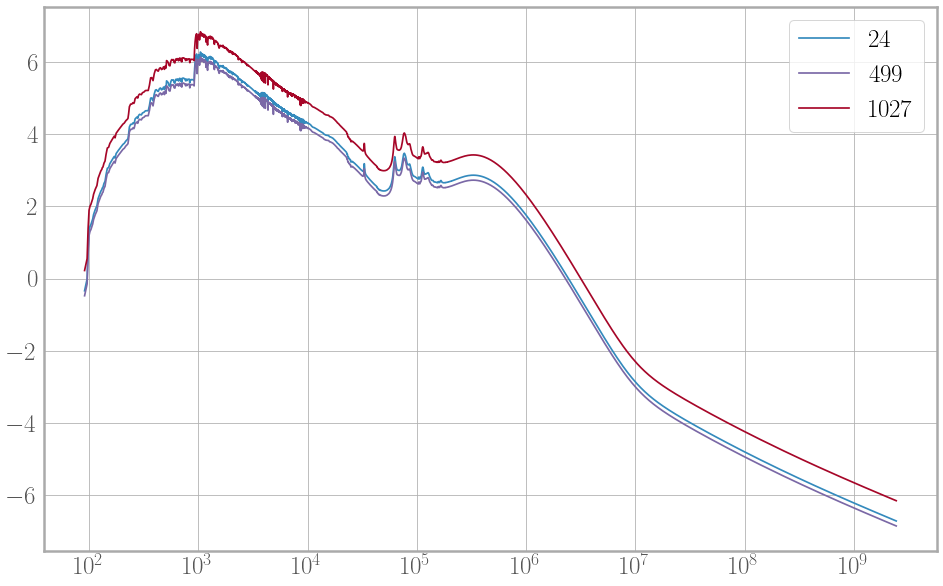

In [45]:
# plt.figure(figsize=(16,10))
fig,ax=plt.subplots(1,1,figsize=(16,10))
# ax.plot(A1,log10(B1),label='23')
ax.plot(10**np.array(A2)/(1+8.999),np.array(B2),label='24')
# ax.plot(A3,log10(B3),label='44')
# ax.plot(log10(A4),log10(B4),label='407')
# ax.plot(A5,log10(B5),label='498')
ax.plot(10**np.array(A6)/(1+7.168),np.array(B6),label='499')
ax.plot(10**np.array(A7)/(1+7.819),np.array(B7),label='1027')
# plt.plot(log10(D),log10(E))
ax.legend()
ax.set_xscale('log')

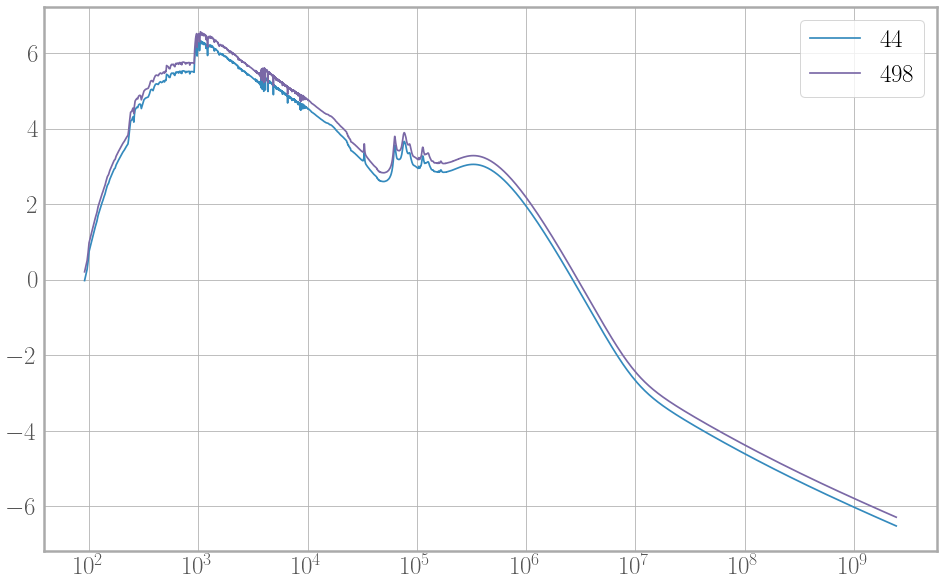

In [44]:
# plt.figure(figsize=(16,10))
fig,ax=plt.subplots(1,1,figsize=(16,10))
# ax.plot(A1,log10(B1),label='23')
# ax.plot(A2,log10(B2),label='24')
ax.plot((10**np.array(A3))/(1+7.1),B3,label='44')
# ax.plot(log10(A4),log10(B4),label='407')
ax.plot((10**np.array(A5))/(1+7.18),B5,label='498')
# ax.plot(A6,log10(B6),label='499')
# ax.plot(A7,log10(B7),label='1027')
# plt.plot(log10(D),log10(E))
ax.legend()
ax.set_xscale('log')

In [10]:
Montague[Montague['redshift']==max(Montague['redshift'])]

,id,redshift,F435W,F435W*,F606W,F606W*,F814W,F814W*,F105W,F105W*,...,F200W,F200W*,F277W,F277W*,F356W,F356W*,F410M,F410M*,F444W,F444W*
305,306,8.996889,-95.0,-94.0,4.358931e-09,4.192419e-09,5.164621e-10,5.931908e-09,-95.0,-94.0,...,1.620164e-08,1.636144e-09,9.199245e-09,1.891901e-09,9.905165e-09,1.767175e-09,7.786970e-09,3.393439e-09,1.440738e-08,2.008968e-09


In [30]:
# Montague[Montague.columns.value() != -95]
mask = (Montague != -95).all(axis=1)
Montague[mask]

,id,redshift,F435W,F435W*,F606W,F606W*,F814W,F814W*,F105W,F105W*,F115W,F115W*,F125W,F125W*,F140W,F140W*,F150W,F150W*,F160W,F160W*,F200W,F200W*,F277W,F277W*,F356W,F356W*,F410M,F410M*,F444W,F444W*
570,571,6.531409,1.716749e-08,5.264677e-09,4.190911e-10,8.164249e-09,3.788664e-08,7.547242e-09,8.911150e-08,1.742221e-08,8.384245e-08,3.495086e-09,8.140130e-08,2.085084e-08,3.987912e-08,3.419145e-08,7.679474e-08,4.252150e-09,6.377478e-08,1.615223e-08,7.930194e-08,3.622315e-09,8.979991e-08,3.149829e-09,1.548040e-07,3.160875e-09,4.062846e-08,5.157391e-09,8.821001e-08,4.574960e-09
682,683,7.741354,1.726758e-09,3.247994e-09,3.666321e-09,6.371427e-09,8.218428e-09,5.982140e-09,1.932064e-08,1.469655e-08,4.578911e-08,2.957181e-09,7.375153e-09,1.802080e-08,3.475404e-08,2.890330e-08,4.744412e-08,3.564361e-09,2.130017e-08,1.285952e-08,4.507420e-08,2.981468e-09,3.931445e-08,2.622062e-09,3.428708e-08,2.558494e-09,3.366096e-08,4.379503e-09,3.294475e-08,3.942331e-09
732,733,6.617976,4.950521e-09,3.695608e-09,6.795083e-09,5.598329e-09,3.425029e-09,5.640145e-09,3.071322e-08,1.349387e-08,2.985200e-08,2.728258e-09,1.315874e-08,1.678273e-08,2.833036e-08,2.671214e-08,1.687801e-08,3.267754e-09,2.157883e-08,1.193756e-08,1.591895e-08,2.582869e-09,2.106554e-08,2.216637e-09,3.475914e-08,2.151913e-09,1.592659e-08,3.774446e-09,1.800135e-08,3.513364e-09
744,745,6.583948,4.470021e-10,5.290673e-09,6.956665e-10,7.724798e-09,2.597547e-08,8.345405e-09,5.439417e-08,1.907791e-08,8.203600e-08,4.003649e-09,5.291461e-08,2.399521e-08,2.382705e-08,3.668616e-08,7.244131e-08,4.779104e-09,9.822192e-08,1.767351e-08,7.702526e-08,3.977952e-09,9.670887e-08,3.929619e-09,1.512193e-07,4.777921e-09,5.393277e-08,6.630784e-09,9.389314e-08,5.749862e-09
828,829,7.386989,3.734965e-09,1.556850e-08,3.681267e-10,5.406969e-09,7.610817e-09,6.197023e-09,3.647611e-08,1.484819e-08,6.981430e-08,2.936219e-09,7.780507e-08,1.343118e-08,4.742013e-08,1.934725e-08,7.640695e-08,3.566108e-09,7.709879e-08,1.038185e-08,5.625132e-08,2.978511e-09,4.803775e-08,2.483928e-09,5.523268e-08,2.377161e-09,1.649014e-07,4.452919e-09,1.052431e-07,3.969697e-09
829,830,6.621431,4.963026e-09,3.855265e-09,3.686567e-09,7.252266e-09,4.042693e-09,7.012302e-09,3.803947e-08,1.697722e-08,2.955659e-08,2.969626e-09,3.549670e-08,1.552610e-08,8.972042e-09,2.538596e-08,4.544096e-08,3.668285e-09,2.672641e-08,1.111399e-08,3.260020e-08,3.168331e-09,4.454882e-08,2.714940e-09,5.897270e-08,2.621169e-09,2.512803e-08,5.468322e-09,2.872172e-08,4.079433e-09
895,896,6.581353,1.365077e-08,5.234935e-09,2.777071e-10,6.016951e-09,1.414422e-08,6.636922e-09,6.476629e-08,1.492048e-08,5.913866e-08,2.698855e-09,5.909025e-08,1.634311e-08,8.869978e-08,2.121360e-08,6.436106e-08,3.401791e-09,4.424176e-08,1.370481e-08,4.927508e-08,2.939133e-09,6.145953e-08,2.628390e-09,9.289202e-08,2.544265e-09,4.486773e-08,4.168560e-09,6.204003e-08,3.815737e-09


In [ ]:
path = os.path.expanduser('~/Documents/CEERS2/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat'))
light=2.998*(10**18) #speed of light in Angstroms ~ A/s
for i in range(len(Montague)):
    potato=str(Montague['id'][i])
    print(i)
#     potato=str(22839)
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    redshift =float(galaxy_fit.index[6].split()[-1])
    galaxy_sed = pd.read_csv(os.path.expanduser(path+'/'+potato+'.sed'),index_col=0,on_bad_lines='skip')
    short = galaxy_sed.drop(galaxy_sed.index[[0,1,2,3,4,5,6,7,8]])
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    lambda_cA = lambda_c*10000
    short2 = pd.DataFrame(columns=['Name']) 
    for i in range(len(short)):
        line = short.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=3:
            continue
        str_line = " ".join(str(item) for item in line)
        short2.loc[i]=str(str_line)

    short2[['A','B','C']] = short2['Name'].str.split(" ",expand=True,)
    short2=short2.drop(['Name'],axis=1)
    SED = Table.from_pandas(short2)
    A=[float(s) for s in SED['A']]
    B=[float(s) for s in SED['B']]
    C=[float(s) for s in SED['C']]
    B = np.array(B)
    A = np.array(A) 
    C = np.array(C)
    L_lambda = 10**B
    L_lambda = L_lambda*3.846*10**33 #  Luminosity in wavelength space (erg/s/A)
    L_lambdaU = 10**C #erg/s/Angstroms
    L_lambdaU = L_lambdaU*3.846*10**33
    lambd = 10**A #Angstroms
    lambd = lambd/(1+redshift) #rest frame wavelength in Angstroms
    L_nu1 = L_lambda*lambd**2/light # Luminosity in frequency space (erg/s/Hz)
    L_nu2 = L_lambdaU*lambd**2/light
    nu = light/lambd #rest frame frequency in Hertz
    dfdf = pd.concat([pd.Series(lambd).rename('lambd'),pd.Series(L_lambda).rename('L_lambdaA'),
                  pd.Series(L_lambdaU).rename('L_lambdaU'),pd.Series(nu).rename('nu'),pd.Series(L_nu1).rename('L_nuA'),
                  pd.Series(L_nu2).rename('L_nuU')], axis=1)
    print(redshift)
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    
    galaxy_fit2 = pd.DataFrame(columns=['Full'])
    for i in range(len(galaxy_fit)):
        line = galaxy_fit.index[i].split(" ")
        while("" in line):
            line.remove("")
        if len(line) !=14:
            continue
        str_line = " ".join(str(item) for item in line)
        galaxy_fit2.loc[i]=str(str_line)


    names = []
    for i in range(len(Filters['Name'])):
          names.append(Filters.iloc[i,0])
    names
    galaxy_fit2[names] = galaxy_fit2['Full'].str.split(" ",expand=True,)
    galaxy_fit2=galaxy_fit2.drop(['Full'],axis=1)
    
    test=Table.from_pandas(galaxy_fit2)
    L_nu40_er=[float(s) for s in test[1]] #1 for error 0 for flux
    L_nu40_er=np.array(L_nu40_er)
    L_lambda40_er=L_nu40_er*light/(lambda_cA)**2
    file_path = f"{'~/Documents/CEERS_beta'}/"+str(potato)+"photom_Ll_er.csv"
    pd.Series(L_lambda40_er).rename('L_lambda40_er').to_csv(file_path,index=False)
    L_nu40=[float(s) for s in test[0]] #1 for error 0 for flux
    L_nu40=np.array(L_nu40)
    L_lambda40=L_nu40*light/(lambda_cA)**2
    file_path = f"{'~/Documents/CEERS_beta'}/"+str(potato)+"photom_Ll.csv"
    pd.Series(L_lambda40).rename('L_lambda40').to_csv(file_path,index=False)
    file_path = f"{'~/Documents/CEERS_beta'}/"+str(potato)+"-RF-lum-CEERS2.csv"
    dfdf.to_csv(file_path, index=False)
    
    

0
7.591939
1
6.42309
2
6.861937
3
6.699558
4
7.132286
5
6.596962
6
6.519713
7
6.781055
8
8.91449
9
8.045012
10
6.961992
11
6.61689
12
7.144324
13
6.03552
14
7.12825
15
8.130661
16
8.932311
17
8.933933
18
6.672578
19
7.44707
20
6.445003
21
6.692822
22
8.124523
23
8.609789
24
6.784055
25
6.105024
26
6.748954
27
6.587145
28
8.857991
29
6.620292
30
7.157981
31
6.46572
32
7.131351
33
8.971644
34
8.214162
35
7.800215
36
6.510423
37
6.721992
38
6.146131
39
8.13488
40
6.059525
41
8.926988
42
8.334259
43
6.608144
44
6.383319
45
6.010237
46
7.616366
47
6.52195
48
6.56037
49
7.196655
50
6.33482
51
6.589744
52
6.803372
53
8.789437
54
7.13188
55
8.919401
56
7.644891
57
7.16958
58
6.519036
59
6.956177
60
6.670301
61
6.764297
62
8.649633
63
7.45393
64
8.552492
65
6.563903
66
7.789805
67
6.591841
68
7.690617
69
7.292713
70
6.581484
71
8.66665
72
7.369882
73
7.256297
74
8.686685
75
7.865901
76
6.615554
77
6.730367
78
6.677628
79
8.643825
80
6.153162
81
6.690948
82
6.658875
83
8.933793
84
6.725208
85
7.

In [5]:
from scipy import stats
from scipy.stats import linregress
def linear_slope_cutoff(x,y,lower,upper):
    mask = (x >= lower)&(x <=upper)
    x_cutoff = x[mask]
    y_cutoff = y[mask]
    slope, intercept,r_value, p_value, std_err = stats.linregress(log10(x_cutoff), log10(y_cutoff))
#     x_fit = np.linspace(lower,upper,1000)
#     y_fit = slope*x_fit + intercept
    return slope,intercept, std_err

from scipy.optimize import curve_fit

def linear_func(x,a,b):
    return a*x+b
def slope_curve_fit(x,y,y_err,lower,upper):
    mask = (x >= lower)&(x <=upper)
    x_cutoff = x[mask]
    y_cutoff = y[mask]
    y_cutoff_err = y_err[mask]
#     print(y_cutoff_err)
    for i in y_cutoff.index:
        if y_cutoff[i] < 0:
            y_cutoff[i] = nan
            y_cutoff_err[i] = nan
    mask2 = np.logical_not(np.isnan(y_cutoff))
    x_cutoff=x_cutoff[mask2]
    y_cutoff=y_cutoff[mask2]
    y_cutoff_err=y_cutoff_err[mask2]
#     sigma = y_cutoff_err/np.sqrt(len(x_cutoff))
    mango = log10(y_cutoff_err+y_cutoff)
    peach = log10(y_cutoff)
    sigma= (mango-peach)
#     print(sigma)
    
    popt,pcov, = curve_fit(linear_func,log10(x_cutoff), log10(y_cutoff), sigma=sigma, absolute_sigma=True)
    
    slope = popt[0]
    intercept = popt[1]
    slope_err = np.sqrt(pcov[0][0])
#     x_fit = np.linspace(lower,upper,1000)
#     y_fit = slope*x_fit + intercept
    return slope,slope_err, intercept#, x_fit, y_fit
#scipy curvefit

In [9]:
path = os.path.expanduser('~/Documents/NOIGM/')
Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
beta=[]
beta_er=[]
betaU=[]
betaU_er=[]
betaP=[]
betaP_er=[]
# sion=[]
bouwen=[]
bouwenA=[]

for i in range(len(Montague)):
    potato=str(Montague['id'][i])
#     potato=str(6020)#10017 #7071   
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    Filters = pd.read_csv(os.path.expanduser(path+'/files/filters.dat'))
    lambda_c =Filters['$\lambda_c$']
    lambda_cA = lambda_c*10000
    L = pd.read_csv(os.path.expanduser('~/Documents/NOIGM-BluminosityParams/'+potato+'photom_Ll.csv'))
    L_lambda40=L['L_lambda40']
    Lx = pd.read_csv(os.path.expanduser('~/Documents/NOIGM-BluminosityParams/'+potato+'photom_Ll_er.csv'))
    L_lambda40_er=Lx['L_lambda40_er']
#     L2 = pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+potato+'-RF-lum-FMIGM'))
    L2 = pd.read_csv(os.path.expanduser('~/notebook/Forrest/'+potato+'-RF-lum-NOIGM'))
    lambd=L2['lambd']
    L_lambda=L2['L_lambdaA']
    L_lambdaU=L2['L_lambdaU']
    redshift =float(galaxy_fit.index[6].split()[-1])

    lower = 1300
    upper = 3000
    slope,intercept, std_err = linear_slope_cutoff(lambd,L_lambda,lower,upper)
    slopeU,interceptU, stdU_err = linear_slope_cutoff(lambd,L_lambdaU,lower,upper)
#     slopeP,interceptP, stdP_err = linear_slope_cutoff2(lambda_cA/(1+redshift),L_lambda40,lower,upper)
    slopeP,slopeP_err, interceptP = slope_curve_fit(lambda_cA/(1+redshift),L_lambda40,L_lambda40_er,lower,upper)
    
    beta.append(slope)
    beta_er.append(std_err)
    betaU.append(slopeU)
    betaU_er.append(stdU_err)
    betaP.append(slopeP)
    betaP_er.append(slopeP_err)

    
    if slopeU > -2:
        sioncalc = 25.13-0.6*(slopeU+2)
    else:
        sioncalc = 25.13-1.1*(slopeU+2)
        
    if slope > -2:
        sionAcalc = 25.13-0.6*(slope+2)
    else:
        sionAcalc = 25.13-1.1*(slope+2)
#     sion.append(logresult)
    bouwen.append(sioncalc)
    bouwenA.append(sionAcalc)

# print(beta,beta_er,betaU,betaU_er,betaP,betaP_er)
# bouwenA=[]


In [10]:
df1=pd.concat([pd.Series(beta).rename('beta'),pd.Series(beta_er).rename('beta_er'),
               pd.Series(betaU).rename('betaU'),pd.Series(betaU_er).rename('betaU_er'),
              pd.Series(betaP).rename('betaP'),pd.Series(betaP_er).rename('betaP_er'),
              pd.Series(bouwen).rename('bouwen'),pd.Series(bouwenA).rename('bouwenA')],axis=1)
df1


,beta,beta_er,betaU,betaU_er,betaP,betaP_er,bouwen,bouwenA
0,0.890812,0.067876,-0.365302,0.064535,1.430816,0.323253,24.149181,23.395513
1,-0.323225,0.013161,-2.695507,0.007718,-0.167478,0.081307,25.895057,24.123935
2,-0.233452,0.028779,-2.174125,0.021945,-0.551884,0.156005,25.321538,24.070071
3,-2.087415,0.018545,-2.137091,0.018492,-1.726278,0.033310,25.280800,25.226156
4,-0.886267,0.021042,-2.230474,0.018343,-0.789213,0.088215,25.383522,24.461760
...,...,...,...,...,...,...,...,...
677,-1.400064,0.008994,-2.553155,0.007709,-1.338209,0.059119,25.738470,24.770039
678,-2.010485,0.006714,-2.656625,0.006456,-1.987157,0.054499,25.852287,25.141534
679,-0.929986,0.013479,-2.456917,0.011374,-0.758557,0.092164,25.632609,24.487992
680,-2.195999,0.020587,-2.358997,0.020350,-2.397684,0.009307,25.524896,25.345598


In [18]:
c=2.998e8
h= 6.626*10**-27#erg*s (1 J = 10**7 ergs, h is traditionally in units of J*s)
#solar luminosity ~ 3.828 *10**33 erg/s #3.846 *10**33
def integral_above_cutoff(L_nu, nu, const):
    cutoff_freq = c / (91.2e-9)
    mask = nu>cutoff_freq
    nu_above_cutoff = nu[mask]
    L_nu_above_cutoff = L_nu[mask]
    dnu = np.diff(nu_above_cutoff)
#     integrand_above_cutoff = integrand(nu_above_cutoff,L_nu_above_cutoff)
    integrand_above_cutoff = L_nu_above_cutoff[1:]/(h*nu_above_cutoff[1:])
#     print(L_nu_above_cutoff[1:])
    integral = np.sum(dnu*integrand_above_cutoff)
#     integral = np.trapz(integrand_above_cutoff, nu_above_cutoff)
    return -integral/(const)#const was x3.846*10**33

In [19]:
path = os.path.expanduser('~/Documents/NOIGM/')

Montague = pd.read_csv(os.path.expanduser(path+'files/observations.dat')) 
sionx=[]
for i in range(len(Montague)):
    potato=str(Montague['id'][i])
#     potato=str(17189)
    galaxy_fit = pd.read_csv(os.path.expanduser(path+'/'+potato+'.fit'),index_col=0,on_bad_lines='skip')
    redshift =float(galaxy_fit.index[6].split()[-1])
#     df = pd.read_csv(os.path.expanduser('~/Documents/FMIGM-BluminosityParams/'+potato+'-RF-lum-FMIGM'),index_col=0,on_bad_lines='skip')
    df=pd.read_csv(os.path.expanduser('~/notebook/Forrest/'+potato+'-RF-lum-NOIGM'),index_col=0,on_bad_lines='skip')
    pos = (df['L_nuU'] - df['L_nuU'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
    const = df['L_nuU'][pos]
#     df
    result=integral_above_cutoff(df['L_nuU'], df['nu'], const) #nu is in Hz df['L_nuU']*3.846*10**33
    logresult=log10(result)
    sionx.append(logresult)

In [21]:
# df2 = pd.concat([df1,pd.Series(sion).rename('sion')],axis=1)
# df2.to_csv('Bluminosity-FMIGM.csv',index=False)
df2
# max(sion)
# max(sionx)

25.415787277462783

In [16]:
huh=pd.read_csv(os.path.expanduser('~/Downloads/kmos_em_ln_integrated_w80_2d_gaussian.txt'))
# huh.columns = huh.iloc[0] ### USE f_hb_bs_16,50,84 = 16th, 50th, 84th percentile flux in 10^-18 ergs/s/cm^2 
huh['f_hb_bs_50_int'] = huh['f_hb_bs_50']/(1+huh['zspec'])
huh

,zfourge_id,zspec,zspec_err,f_hb,f_hb_err,f_o3,f_o3_err,o3_sigma,o3_sigma_err,f_hb_bs_50,...,f_o3_sigma_bs_50,f_o3_sigma_bs_16,f_o3_sigma_bs_84,f_w80_bs_50,f_w80_bs_16,f_w80_bs_84,f_vasym_bs_50,f_vasym_bs_16,f_vasym_bs_84,f_hb_bs_50_int
0,10936,3.604,0.000150,4.360000e+00,5.75,114.0,13.00,5.23,0.827,-999.00,...,5.17,4.69,5.72,1.14,0.956,1.46,2.720000e-11,-1.830000e+01,1.830000e+01,-216.985230
1,11999,3.603,0.000096,2.900000e+01,6.92,195.0,14.90,5.07,0.529,28.90,...,5.16,4.71,5.55,1.22,1.100,1.35,2.720000e-11,-2.720000e-11,1.830000e+01,6.278514
2,12533,3.568,0.000067,3.200000e+01,5.66,239.0,11.70,5.71,0.372,32.50,...,5.81,5.62,6.05,1.35,1.290,1.52,-1.840000e+01,-3.680000e+01,-1.840000e+01,7.114711
3,13155,3.064,0.000214,1.760000e-07,13.40,68.4,12.70,4.25,0.740,-999.00,...,4.34,3.82,5.10,1.28,1.080,1.48,4.140000e+01,2.070000e+01,6.210000e+01,-245.816929
4,13203,3.563,0.000184,3.770000e+00,3.54,84.7,9.93,6.32,0.941,3.77,...,6.55,6.03,6.86,1.66,1.210,1.83,7.370000e+01,3.680000e+01,1.110000e+02,0.826211
5,15111,2.987,0.000046,-9.990000e+02,-999.00,92.2,4.13,3.65,0.270,-999.00,...,3.64,3.54,3.74,1.35,1.320,1.37,2.110000e+01,2.110000e+01,2.110000e+01,-250.564334
6,15357,-999.000,-999.000000,-9.990000e+02,-999.00,-999.0,-999.00,-999.00,-999.000,-999.00,...,-999.00,-999.00,-999.00,-999.00,-999.000,-999.00,-9.990000e+02,-9.990000e+02,-9.990000e+02,1.001002
7,15992,3.653,0.000068,3.740000e+01,8.49,272.0,13.60,5.60,0.384,36.90,...,5.57,5.30,5.81,1.29,1.150,1.43,1.810000e+01,4.220000e-15,5.420000e+01,7.930368
8,18742,3.436,0.000046,1.100000e+01,2.57,89.7,4.94,2.73,0.312,10.90,...,2.65,2.38,2.84,1.27,1.000,1.34,-4.000000e-15,-1.890000e+01,2.720000e-11,2.457169
9,19437,3.436,0.000046,-9.990000e+02,-999.00,-999.0,-999.00,-999.00,-999.000,46.90,...,-999.00,-999.00,-999.00,-999.00,-999.000,-999.00,-9.990000e+02,-9.990000e+02,-9.990000e+02,10.572588


In [25]:
hb_sion=[]
for i in range(len(huh['zfourge_id'])):
#     df = pd.read_csv(os.path.expanduser('~/Documents/FINAL-BluminosityParams/'+str(huh['zfourge_id'][i])+'-RF-lum-FINAL'),index_col=0,on_bad_lines='skip')
    df=pd.read_csv(os.path.expanduser('~/notebook/Forrest/'+str(huh['zfourge_id'][i])+'-RF-lum-NOIGM'),index_col=0,on_bad_lines='skip')
    
    redshift=huh['zspec'][i]
    print('redshift='+str(redshift))
    pos = (df['L_lambdaA'] - df['L_lambdaA'].iloc[(df['nu']-c/1500e-10).abs().argsort()[0]]).abs().argsort()[0]
    L_UV = (df['L_nuA'][pos]) #conversion to ergs/s
#     print('L_UV '+str(df['L_lambdaU'][pos]/3.826*10**33))
    x=cosmo.luminosity_distance(redshift)
    meters=x*3.0857*10**22 #Mpc to m
    cm = meters*100
    dist2 = cm.value
    L_hb=huh['f_hb_bs_50_int'][i]*10**-18*4*pi*dist2**2
#     print('L_hb '+str(L_hb))
    caseB= 4.86*10**-13
    spec_sion=log10(L_hb/(L_UV*caseB))
    print(str(huh['zfourge_id'][i])+' sion '+str(spec_sion))
    print('##################')
    hb_sion.append(spec_sion)

# spec_sion

huh['spec_sion']=hb_sion
huh.to_csv('specsions.csv')

In [31]:
# df = pd.read_csv(os.path.expanduser('~/Documents/FINAL-BluminosityParams/'+str(huh['zfourge_id'][15])+'-RF-lum-FINAL'),index_col=0,on_bad_lines='skip')
# redshift=3.514
# pos=np.abs((df4['nu'] - c/1500e-10)).idxmin()
# L_UV = ((df4['L_nuA'][pos])) #conversion to 
# # df['lambd'][pos]
# print(pos)
# # df['L_lambdaU'][pos]
# # L_UV
# print(df4['L_lambdaA'][pos]*(1500)/3.826*10**33)
# L_UV

# # redshift=huh['zspec'][0]
# x=cosmo.luminosity_distance(3.514)
# meters=x*3.0857*10**22 #Mpc to m
# cm = meters*100
# dist2 = cm.value
# L_hb=huh['f_hb_bs_50_int'][15]*10**-18*4*pi*dist2**2

# L_hb

# L_UV=(df4['L_nuA'].iloc[182]+df4['L_nuA'].iloc[181])/2

# df4 #22839

# L_hb/(L_UV*caseB)
# # print(L_UV)

# redshift=6.753
# x=cosmo.luminosity_distance(huh['zspec'][0])
# meters=x*3.0857*10**22 #Mpc to m
# cm = meters*100
# distM = cm.value
# L_UV_Mat = 4*10**-3*10**-18*1500
# L_UV_Mat

# caseB= 4.86*10**-13
# log10(L_hb/(L_UV*caseB))

1.3291054126062755e-06


In [126]:
# main= Table.read('~/Downloads/MW_44fields_main_table_v1.0.fits')
# main

# # load your tables into dataframes
# table1 = main
# table2 = Table.read('~/notebook/Laptop/ra_dec.csv')

# # extract the RA and DEC columns from each table
# ra1, dec1 = table1['RA'], table1['DEC']
# ra2, dec2 = table2['ra'], table2['dec']

# # set a tolerance for matching coordinates (in degrees)
# tolerance = 1/3600

# # initialize an empty list to store matching indices
# match_indices = []

# # loop over each coordinate in table1 and search for matches in table2
# for i in range(len(ra1)):
#     for j in range(len(ra2)):
#         # calculate the angular separation between the two coordinates
#         sep = np.sqrt((ra1[i]-ra2[j])**2 + (dec1[i]-dec2[j])**2)
        
#         # check if the separation is within the tolerance
#         if sep < tolerance:
#             # if so, add the index of the matching coordinate to the list
#             match_indices.append(i)

# # remove duplicates from the list of matching indices
# match_indices = list(set(match_indices))

# # print the number of matching coordinates found
# print(f'Found {len(match_indices)} matching coordinates.')

# # print(len(match_indices2))
# len(match_indices)
# main[match_indices]

# # array(main[match_indices]['LEAD_LINE'])
# plt.figure(figsize=(16,10))
# plt.scatter(main[match_indices]['RA'],main[match_indices]['DEC'],s=400)
# plt.scatter(table2[match_indices2]['ra'],table2[match_indices2]['dec'],s=400,alpha=0.4)
# plt.scatter(53.07148546955744,-27.798438651150814,c='g',s=400)

# one= Table.read('~/Downloads/aper_spectrum_candels-cdfs-22_122011067.fits')
# one

# # plt.figure(figsize=(16,10))
# fig,ax=plt.subplots(1,1,figsize=(16,10))
# mpl.rcParams.update({'font.size': 22})
# plt.plot(one['WAVE_VAC']/(1+3.29),one['FLUX'], linewidth=3)
# # plt.plot(one['WAVE_AIR']/(1+3.29),one['FLUXERR'],zorder=2)
# # ax.axvline(x=1216.0,c='g',alpha=0.8)
# plt.scatter(one['WAVE_VAC'][373]/(1+3.29),one['FLUX'][373],s=400,facecolor='white',edgecolor='k')
# # plt.arrow(1500,-10,-10,250,head_width=30, head_length=1, fc='k', ec='k')
# plt.annotate(r'Lyman-$\alpha$',xy=(1230,250),size=25)
# # ax.axvline(x=1218.,c='r',alpha=0.4)
# # ax.axvline(x=1213.4,c='r',alpha=0.4)
# plt.xlim(1150,1300)
# plt.ylim(-20,300)
# plt.xlabel('rest frame wavelength /$\AA$')
# plt.ylabel(r'flux $/erg/s/cm^2/\AA$')
# plt.grid(False)
# plt.savefig('2'+'lya'+'overleaf.pdf',format='pdf', dpi=600, bbox_inches='tight')
# #Get the peak value of the lyman alpha emission
# #plug into calculator for emission 
# #derive the sn for one obs and multiply by sqrt16

# emline[emline['UNIQUE_ID']==102045171]

# # from astropy.utils.data import get_pkg_data_filename
# emline = Table.read('~/Downloads/MW_1-24_emline_table.fits')
# emline

/home/magnus/notebook/jupyterenv/lib/python3.8/site-packages/astropy/table/column.py:329: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(Column, self), op)(other)


UNIQUE_ID,POINTING_ID,OBJ_ID,RID,IDENT,COMMENT,SN,RA_SN,DEC_SN,LAMBDA_SN,RA_PEAK_SN,DEC_PEAK_SN,LAMBDA_PEAK_SN,LAMBDA_NB_MIN,LAMBDA_NB_MAX,RA_1MOM,DEC_1MOM,R_KRON,F_KRON,F_2KRON,F_3KRON,F_4KRON,F_KRON_ERR,F_2KRON_ERR,F_3KRON_ERR,F_4KRON_ERR,BORDER_FLAG
,,,,,,,deg,deg,Angstrom,deg,deg,Angstrom,Angstrom,Angstrom,deg,deg,arcsec,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),
bytes10,int16,int16,int16,bytes5,bytes27,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
101001006,1,1,1,O2,-,52.801054840483985,53.06025679883623,-27.813499272544774,4886.836172204812,53.06021005230657,-27.81346573752803,4886.326171875,4874.451171875,4893.201171875,53.06021364319668,-27.813449807787595,0.9127489866630127,7366.35009765625,11657.6123046875,12519.326171875,13284.0576171875,217.48802185058594,433.3252716064453,649.1604614257812,867.0639801025391,False
